In [ ]:
# Importing relevant packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly as pt
import plotly.express as px
!pip install twython
import twython as Twython
import json

### **Read in CSV files**

In [ ]:
# Reading CSV files
players = pd.read_csv('/content/People.csv')
batting = pd.read_csv('/content/Batting.csv')
salary = pd.read_csv('/content/Salaries.csv')
teams = pd.read_csv('/content/Teams.csv')
pitcher = pd.read_csv('/content/Pitching.csv')

### **Merging Datasets**

In [ ]:
# Merging "Players" dataset with "Batting" on PlayerID into a new dataframe "Combined."
playerHits = pd.merge(players, batting, on='playerID')
combined = pd.merge(playerHits, salary, on=['yearID', 'teamID', 'lgID', 'playerID'])

# Grouping the Combined dataframe with the YearID, while aggregating the maximum Hits.
bestHitter = combined.groupby(['yearID']).agg({'H':'max'}).reset_index()

# Merging the BestHitter dataset with Combined, on YearID and Hits. 
bestHitterStats = pd.merge(bestHitter, combined, on=['yearID', 'H'])

## **Analysis 1**

**Side-by-side Comparison Visualization of HomeRun to Hits vs. Strikeouts Statistics** (Time Series Analysis)


In **baseball statistics**, **home run per hit (HR/H)** is the percentage of hits that are home runs. It is loosely related to isolated power, which is the ability to hit for extra-base hits, including home runs.

In [ ]:
# Creating a ratio for home run per hit 
batting['ratio'] = batting['HR']/batting['H']
batting = batting.dropna(subset=['ratio'])

In [ ]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,ratio
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,0.000000
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,0.000000
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,0.045455
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,0.000000
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,1,0,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,0.0,0.000000


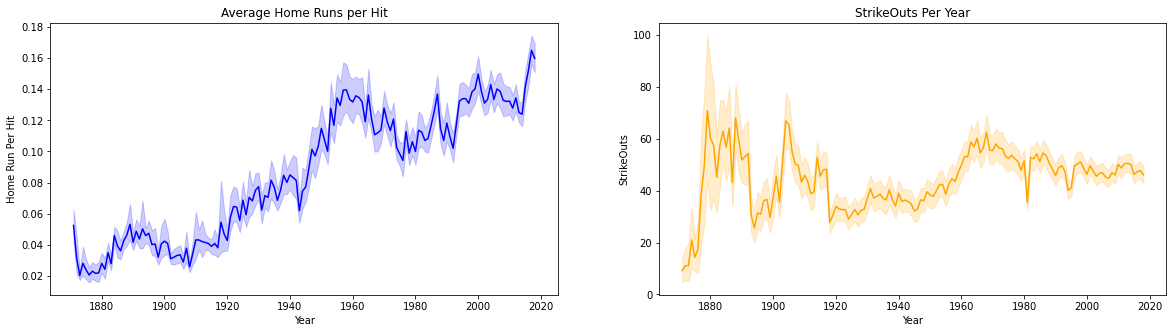

In [ ]:
# Setting dimensions
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

# Plotting highest hits with Time Series Analysis (First Graph)
Hits = sns.lineplot(x='yearID', y='ratio', data=batting[batting.ratio > 0], ax=axes[0], color="blue")

# Plotting highest hits with Time Series Analysis (Second Graph)
SalaryTrends = sns.lineplot(x='yearID', y='SO', data=pitcher, ax=axes[1], color="orange")

# Customizing the x and y labels
Hits.set(xlabel='Year', ylabel='Home Run Per Hit', title='Average Home Runs per Hit')
SalaryTrends.set(xlabel='Year', ylabel='StrikeOuts', title='StrikeOuts Per Year')

# Converting from Scientific Notation to a simple one
plt.ticklabel_format(style='plain', axis='y')
#plt.savefig('HR_to_strikeouts.png')

## **Analysis 2:**

**Team Analysis: Highest and Lowest Salaries** 

In [ ]:
# Now, let's analyze the salaries of the Highest and Lowest Teams:

# We create a new dataframe by combining Players and Salary on PlayerID.
combined = pd.merge(players, salary, on=['playerID'])

# Consequently, we merge the new dataframe with teamSalary, on YearID and TeamID. 
teamSalary = pd.merge(combined, teams, on=['yearID', 'teamID'])

# Group by the new dataframe by name & TeamID. We are combining them on both to avoid duplication.
averageTeamSalary = teamSalary.groupby(['name', 'teamID', 'yearID']).agg({'salary':'mean'}).reset_index()

result = teamSalary.groupby(['name', 'teamID']).agg({'salary':'mean'}).reset_index()

# Sorting values by salary, sorting in descending order.
highest_salary_team = averageTeamSalary.sort_values(by='salary', ascending=False).head(10)

# Sorting values by salary, sorting in ascending order.
lowest_salary_teams = averageTeamSalary.sort_values(by='salary', ascending=False).tail(10)

# Combining the top 5 and bottom 5 and naming it as "disparity"
disparity = highest_salary_team.head().append(lowest_salary_teams.tail(5))

Text(0, 0.5, 'Salary (USD)')

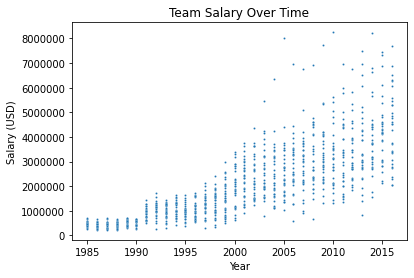

In [ ]:
temp = sns.scatterplot(x='yearID', y='salary', data=averageTeamSalary, s=4)
plt.ticklabel_format(style='plain', axis='y')
temp.set(title="Team Salary Over Time")
temp.set_xlabel('Year')
temp.set_ylabel('Salary (USD)')
#plt.savefig('team_salary_per_year2.png')

### **Side-by-side analysis for Highest and Lowest Paid Teams in USA**

**The code for it:**

In [ ]:
# Sorting values by salary, sorting in descending order, for the top 5 values
top5_salary_team = result.sort_values(by='salary', ascending=False).head(5)

# Sorting values by salary, sorting in ascending order, for the lowest 5 values
low5_salary_teams = result.sort_values(by='salary', ascending=False).tail(5)


**Visualization:**

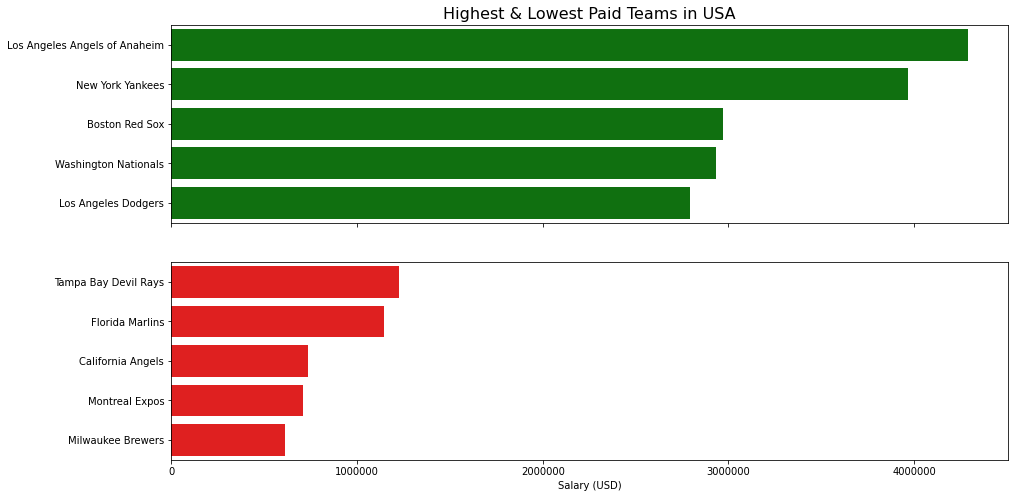

In [ ]:
# Setting dimensions
fig, axes = plt.subplots(2,1 , sharex=True, figsize=(15,8))

# Plotting highest hits with Time Series Analysis (First Graph)
m = sns.barplot(y="name", x="salary", data=top5_salary_team, ax=axes[0], 
                color="green")

# Plotting highest hits with Time Series Analysis (Second Graph)
n = sns.barplot(y="name", x="salary", data=low5_salary_teams, ax=axes[1], 
                color="red")

# Customizing the x and y labels
m.set(xlabel=' ', ylabel='')
n.set(xlabel='Salary (USD)', ylabel='')

# Setting the title of the graph
m.set_title("Highest & Lowest Paid Teams in USA", fontsize = 16)

# Converting from Scientific Notion to a simple one
plt.ticklabel_format(style='plain', axis='x')
#plt.savefig('highest_vs_lowest_paid.png')

## **Analysis 3**

**ScatterPlot of Salary & number of Wins**



In this analysis, we're trying to figure out if there's a correlation between **Salary** and **# of Wins** for baseball teams from 2008.

In [ ]:
# Getting average wins, grouped by every team
#aggregatedWins = teams.groupby(['teamID', 'yearID']).agg({'W':'mean'}).reset_index() 
combined = pd.merge(averageTeamSalary, teams, on=['teamID','yearID'])
last10Years = combined[combined.yearID > 2008]

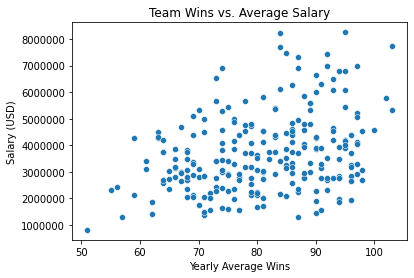

In [ ]:
# Plotting a scatterplot of Salary vs. Average Wins 
p = sns.scatterplot(x='W', y='salary', data=last10Years)
plt.ticklabel_format(style='plain', axis='y')

p.set_xlabel("Yearly Average Wins")
p.set_ylabel("Salary (USD)")
p.set(title="Team Wins vs. Average Salary")
plt.savefig('Wins_vs_salary.png')

In [ ]:
# Now, let's calculate the correlation. 
last10Years[['salary','W']].corr(method='pearson')

,salary,W
salary,1.000000,0.332904
W,0.332904,1.000000


#### **Conclusion:**

[Correlation](https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm) refers to a relationship between two or more objects. *In statistics, the word correlation refers to the relationship between two variables. We wish to be able to quantify this relationship, measure its strength, develop an equation for predicting s/contents, and ultimately draw testable conclusion about the parent population.*

In this case, we have calculated **0.333** correlation between average wins and salary. Correlation coefficients whose magnitude are between **0.25 and 0.5** indicate variables which can be considered **weakly correlated.**

## **Analysis 4:**

**Analyzing battings statistics with correlation & Heatmap for the last 10 years**

In [ ]:
#Calculating correlation
batting[['2B', '3B', 'HR', 'SO']].corr(method='pearson')
test = batting
test[['Double', 'Triple', 'Home Run', 'Strike Out', 'yearID']] = batting[['2B', '3B', 'HR', 'SO', 'yearID']].reset_index(drop=True)
test = test[test.yearID > 2008]
testcorrelation = test[['Double','Triple','Home Run','Strike Out']].corr(method='pearson')

[Text(0.5, 1.0, 'Heatmap of Batting Statistics')]

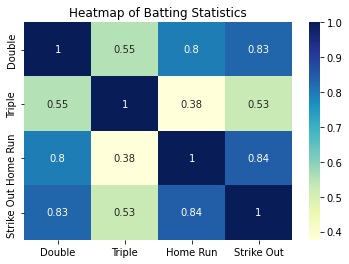

In [ ]:
#Plotting a heatmap
x = sns.heatmap(testcorrelation, cmap="YlGnBu",annot=True)
x.set(title="Heatmap of Batting Statistics")
#plt.savefig('strikeout_heatmap.png')

[Text(0.5, 1.0, 'Regression of Homeruns to StrikeOuts')]

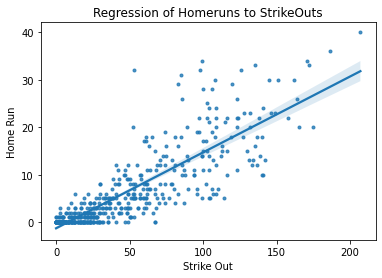

In [ ]:
x = sns.regplot(x="Strike Out", y="Home Run", data=test.sample(frac=0.1), marker="." )
x.set(title="Regression of Homeruns to StrikeOuts")
#plt.savefig('strikeout_regression.png')

##**Ideas that didn't pan out**

###Hits vs Strikeouts

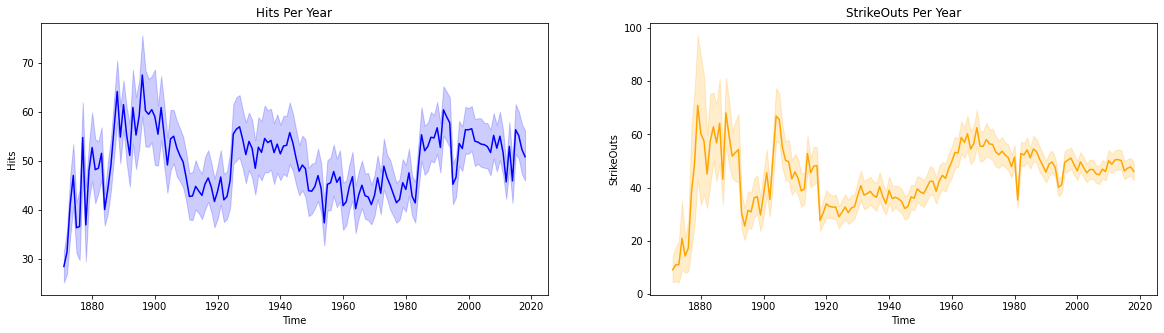

In [ ]:
# Setting dimensions
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

# Plotting highest hits with Time Series Analysis (First Graph)
Hits = sns.lineplot(x='yearID', y='H', data=batting, ax=axes[0], color="blue")

# Plotting highest hits with Time Series Analysis (Second Graph)
SalaryTrends = sns.lineplot(x='yearID', y='SO', data=pitcher, ax=axes[1], color="orange")

# Customizing the x and y labels
Hits.set(xlabel='Time', ylabel='Hits', title='Hits Per Year')
SalaryTrends.set(xlabel='Time', ylabel='StrikeOuts', title='StrikeOuts Per Year')

# Converting from Scientific Notation to a simple one
plt.ticklabel_format(style='plain', axis='y')
#plt.savefig('hits_to_strikeouts.png')

###Strikeout Trend Analysis

In [ ]:
n = sns.lineplot(x='yearID', y='SO', data=batting)
n = sns.lineplot(x='yearID', y='HR', data=batting)
n.set(title="Strikeout vs. Hits", ylabel='')
plt.legend(loc='upper right', labels=["Strikeout","Hit"])
#plt.savefig('strikeout vs. homeruns.png')